In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

#import some packages to use
import numpy as np
import cv2
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#to see the our directory
import os
import random
import gc


['train', 'test']


In [121]:
train_path = '../input/train'
test_path = '../input/test'

train_dogs = ['../input/train/{}'.format(i) for i in os.listdir(train_path) if 'dog' in i]
train_cats = ['../input/train/{}'.format(i) for i in os.listdir(train_path) if 'cat' in i]

test_imgs = [';;/input/test/{}'.format(i) for i in os.listdir(test_path)]

train_imgs = train_dogs[:2000] + train_cats[:2000]
random.shuffle(train_imgs)

del train_dogs
del train_cats
gc.collect()

5347

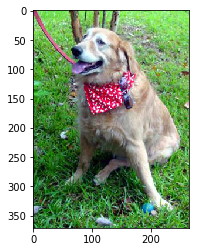

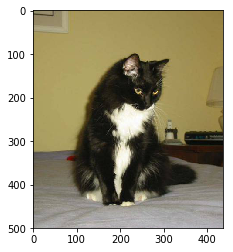

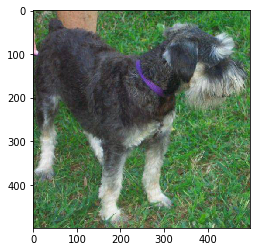

In [122]:
for i in train_imgs[-3:]:
    img = plt.imread(i)
    plt.imshow(img)
    plt.show()

In [123]:
#resizing, declaring dimensions
#colored image : 150x150x3
n_cols = 150
n_rows = 150
channels = 3

In [124]:
def image_processing(image_list):
    '''read and process images with resizing
    returns two arrays:
    X is an array of resized images
    y is an array of labels
    '''
    X = [] # images
    y = [] # labels
    
    for img in image_list:
        X.append(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        
        if 'dog' in img:
            y.append(1)
        elif 'cat' in img:
            y.append(0)
            
    return X, y
    

In [125]:
X, y = image_processing(train_imgs)

In [126]:
X[0]

array([[[105,  90,  71],
        [127, 107,  94],
        [ 97,  78,  70],
        ...,
        [220, 203, 176],
        [205, 188, 161],
        [247, 229, 206]],

       [[ 80,  73,  55],
        [107,  90,  77],
        [ 99,  81,  71],
        ...,
        [202, 185, 158],
        [228, 211, 185],
        [248, 231, 207]],

       [[ 63,  62,  45],
        [ 98,  89,  71],
        [ 90,  74,  59],
        ...,
        [193, 176, 149],
        [237, 220, 193],
        [250, 233, 206]],

       ...,

       [[130, 148, 155],
        [115, 142, 147],
        [113, 139, 156],
        ...,
        [ 12,   6,   8],
        [ 12,   6,   7],
        [  8,   4,   3]],

       [[125, 145, 153],
        [119, 150, 151],
        [108, 135, 147],
        ...,
        [ 11,   5,   6],
        [ 11,   5,   6],
        [ 12,   5,   5]],

       [[121, 148, 159],
        [112, 147, 147],
        [123, 152, 158],
        ...,
        [ 13,   7,   8],
        [ 13,   7,   8],
        [ 20,   7,   7]]

In [127]:
np.unique(y)

array([0, 1])

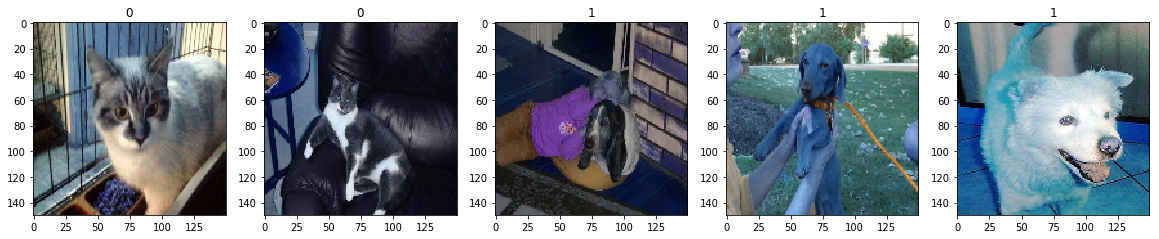

In [128]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(columns/columns + 1, columns, i+1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.show

In [129]:
import seaborn as sns
del train_imgs
del test_imgs
gc.collect()

17239

Text(0.5, 1.0, 'Lables for cats and dogs')

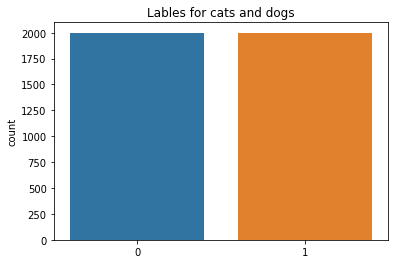

In [130]:
X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title("Lables for cats and dogs")

In [131]:
X.shape, y.shape

((4000, 150, 150, 3), (4000,))

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3200, 150, 150, 3), (3200,), (800, 150, 150, 3), (800,))

In [133]:
del X
del y
gc.collect()

10

In [134]:
n_train = len(X_train)
n_test = len(X_test)

batch_size=32 # note batch size should be afactor of 2 i.e., 4,6,10, 12 etc

In [135]:
#importing keras modules
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import ModelCheckpoint


In [93]:
#emulating vgg16 architecture

model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 256)       295168    
__________

In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [97]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [98]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size)

In [115]:
history = model.fit_generator(train_generator,
                   steps_per_epoch=n_train//batch_size,
                   epochs=100,
                   validation_data=test_generator,
                   validation_steps=n_test//batch_size,
                   workers=3, 
                   callbacks=[ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)])

Epoch 1/100
100/100 [==============================] - 16s 158ms/step - loss: 0.2704 - acc: 0.8841 - val_loss: 0.3487 - val_acc: 0.8562
Epoch 2/100
100/100 [==============================] - 15s 151ms/step - loss: 0.2462 - acc: 0.8953 - val_loss: 0.3457 - val_acc: 0.8500
Epoch 3/100
100/100 [==============================] - 16s 157ms/step - loss: 0.2498 - acc: 0.8962 - val_loss: 0.3251 - val_acc: 0.8512
Epoch 4/100
100/100 [==============================] - 16s 157ms/step - loss: 0.2490 - acc: 0.8869 - val_loss: 0.4342 - val_acc: 0.8512
Epoch 5/100
100/100 [==============================] - 16s 158ms/step - loss: 0.2520 - acc: 0.8903 - val_loss: 0.3992 - val_acc: 0.8438
Epoch 6/100
100/100 [==============================] - 16s 156ms/step - loss: 0.2640 - acc: 0.8825 - val_loss: 0.4389 - val_acc: 0.8475
Epoch 7/100
100/100 [==============================] - 16s 157ms/step - loss: 0.2589 - acc: 0.8891 - val_loss: 0.3334 - val_acc: 0.8650
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 16s 160ms/step - loss: 0.1561 - acc: 0.9366 - val_loss: 0.3182 - val_acc: 0.8800
Epoch 62/100
100/100 [==============================] - 16s 159ms/step - loss: 0.1565 - acc: 0.9331 - val_loss: 0.3071 - val_acc: 0.8875
Epoch 63/100
100/100 [==============================] - 16s 156ms/step - loss: 0.1626 - acc: 0.9316 - val_loss: 0.3100 - val_acc: 0.8850
Epoch 64/100
100/100 [==============================] - 16s 157ms/step - loss: 0.1370 - acc: 0.9447 - val_loss: 0.3977 - val_acc: 0.8788
Epoch 65/100
100/100 [==============================] - 16s 157ms/step - loss: 0.1448 - acc: 0.9434 - val_loss: 0.3385 - val_acc: 0.8788
Epoch 66/100
100/100 [==============================] - 16s 157ms/step - loss: 0.1560 - acc: 0.9397 - val_loss: 0.4312 - val_acc: 0.8700
Epoch 67/100
100/100 [==============================] - 16s 157ms/step - loss: 0.1512 - acc: 0.9441 - val_loss: 0.3001 - val_acc: 0.8912
Epoch 68/100
100/100 [===================

In [148]:
model.save_weights('model_weights.h5')
model.save('model_conv2d.h5')

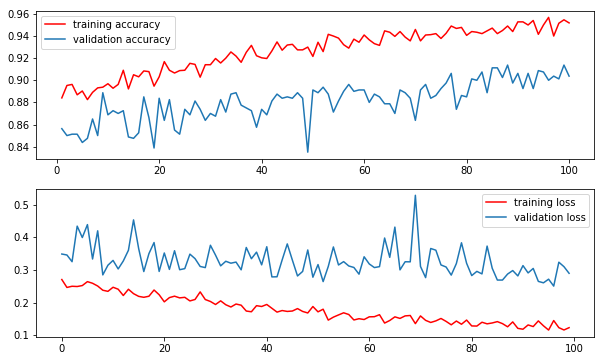

In [154]:
plt.figure(figsize=(10,6))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.subplot(2,1,1)
plt.plot(epochs, acc,'r', label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(loss,'r',label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend()

In [139]:
test_imgs = ['../input/test/{}'.format(i) for i in os.listdir(test_path)]
X_test, y_test =image_processing(test_imgs[:10]) #y_test, in this case will be empty
X_test = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

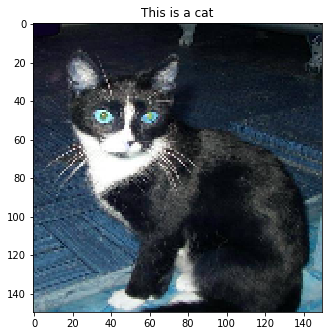

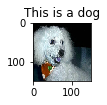

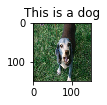

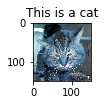

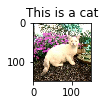

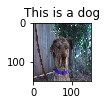

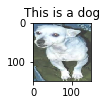

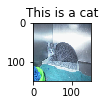

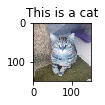

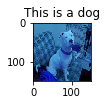

In [143]:
i=0
test_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X_test, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        test_labels.append('dog')
    else:
        test_labels.append('cat')
    plt.subplot(5/columns +1, columns, i+1)
    plt.title('This is a ' + test_labels[i])
    plt.imshow(batch[0])
    i += 1
    if i%10 ==0:
        break
    plt.show()
    